# Download OSTIA

`conda install copernicusmarine`

In [1]:
import copernicusmarine

/Users/rwegener/miniconda3/envs/copernicusmarine/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
copernicusmarine.login()

username:

  rwegener


password:

  ········


INFO - 2024-12-05T01:17:20Z - Credentials file stored in /Users/rwegener/.copernicusmarine/.copernicusmarine-credentials.


True

OSTIA dataset & dataset id:

https://data.marine.copernicus.eu/product/SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001/services

In [4]:
dataset_id = 'METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2'

In [8]:
datasets = copernicusmarine.describe(
   include_datasets = True, 
   contains = [dataset_id]
)

WARNING - 2024-12-05T01:18:45Z - Deprecation warning for option 'include_datasets'. This option will no longer be available in copernicusmarine>=2.0.0. Please refer to the documentation when the new major version is released for more information.


In [25]:
copernicusmarine.subset(
    dataset_id = dataset_id,
    variables = ["analysed_sst"],
    start_datetime = "2002-09-01T00:00:00",
    end_datetime = "2023-09-01T00:00:00",
    minimum_longitude = -77.5,
    maximum_longitude = -75.5, 
    minimum_latitude = 36.75,
    maximum_latitude = 40,
    output_directory = '../../data/raw',
)
# '20020901', '20230831'
# lat=slice(36.75, 40), lon=slice(-77.5, -75.5)

INFO - 2024-12-05T01:28:57Z - Dataset version was not specified, the latest one was selected: "default"
INFO - 2024-12-05T01:28:57Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-12-05T01:29:00Z - Service was not specified, the default one was selected: "arco-time-series"
WARNING - 2024-12-05T01:29:03Z - Some or all of your subset selection [2002-09-01 00:00:00, 2023-09-01 00:00:00] for the time dimension  exceed the dataset coordinates [2007-01-01 00:00:00, 2024-12-03 00:00:00]
INFO - 2024-12-05T01:29:03Z - Downloading using service arco-time-series...
INFO - 2024-12-05T01:29:06Z - <xarray.Dataset>
Dimensions:       (time: 6088, latitude: 65, longitude: 40)
Coordinates:
  * latitude      (latitude) float32 36.78 36.83 36.88 ... 39.88 39.92 39.97
  * longitude     (longitude) float32 -77.47 -77.43 -77.38 ... -75.57 -75.53
  * time          (time) datetime64[ns] 2007-01-01 2007-01-02 ... 2023-09-01
Data variables:
    analysed_sst  (time, latitude, l

  Y


INFO - 2024-12-05T01:29:09Z - Writing to local storage. Please wait...
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 377/377 [00:03<00:00, 107.84it/s]
INFO - 2024-12-05T01:29:13Z - Successfully downloaded to ../../data/raw/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_77.47W-75.53W_36.78N-39.97N_2007-01-01-2023-09-01.nc


PosixPath('../../data/raw/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_77.47W-75.53W_36.78N-39.97N_2007-01-01-2023-09-01.nc')

Opening the downloaded dataset

In [16]:
import xarray as xr

In [17]:
ds = xr.open_dataset('METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_77.47W-75.53W_36.78N-39.97N_2022-08-31-2023-08-31.nc')

In [23]:
ds.analysed_sst

<xarray.DataArray 'analysed_sst' (time: 366, latitude: 65, longitude: 40)>
[951600 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 36.78 36.83 36.88 36.92 ... 39.88 39.92 39.97
  * longitude  (longitude) float32 -77.47 -77.43 -77.38 ... -75.62 -75.57 -75.53
  * time       (time) datetime64[ns] 2022-08-31 2022-09-01 ... 2023-08-31
Attributes:
    comment:         OSTIA foundation SST
    coordinates:    lon lat
    long_name:      analysed sea surface temperature
    reference:      Good S, Fiedler E, Mao C, Martin MJ, Maycock A, Reid R, R...
    source:         AVHRR18_G-NAVO-L2P-V1.0, AVHRR19_G-NAVO-L2P-V1.0, AVHRR_S...
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      4500
    valid_min:      -300

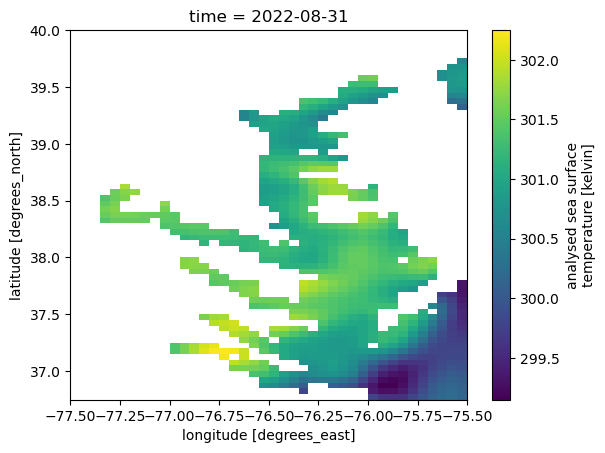

In [22]:
ds.analysed_sst.isel(time=0).plot()